<a href="https://colab.research.google.com/github/chirag-trivedi/data-science/blob/main/EDA_Melbourne_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [ ]:
data = pd.read_csv('Melbourne_Housing.csv')

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


In [ ]:
data.shape

(27114, 16)

27114 rows and 16 cols

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


10 numerical cols
rest are categorical

In [ ]:
data['BuildingArea'].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

There are inf and missing data in building area

In [ ]:
data['BuildingArea'].apply(type).value_counts()

,count
BuildingArea,
<class 'float'>,16571
<class 'str'>,10543


In [ ]:
data['BuildingArea'] = data['BuildingArea'].replace(['missing','inf'],np.nan)

In [ ]:
data['BuildingArea'] = data['BuildingArea'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10529 non-null  float64
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 3.3+ MB


In [ ]:
data_new = pd.read_csv('Melbourne_Housing.csv',na_values=['missing','inf'])

In [ ]:
data_new['BuildingArea'].dtype

dtype('float64')

Missing Value Treatment

In [ ]:
data.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
SellerG,0
Date,0
Distance,1
Postcode,1
Bedroom,6436
Bathroom,6442
Car,6817


Check for dupes

In [ ]:
data.duplicated().sum()

11

In [ ]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

Statistical Summary of Data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27103.000,2.992,0.955,1.000,2.000,3.000,4.000,16.000
Distance,27102.000,11.280,6.784,0.000,6.400,10.500,14.000,48.100
Postcode,27102.000,3113.787,111.129,3000.000,3046.000,3088.000,3153.000,3978.000
Bedroom,20678.000,3.046,0.955,0.000,2.000,3.000,4.000,20.000
Bathroom,20672.000,1.592,0.701,0.000,1.000,1.000,2.000,9.000
Car,20297.000,1.716,0.994,0.000,1.000,2.000,2.000,18.000
Landsize,17873.000,560.537,1411.309,50.000,220.000,513.000,664.000,76000.000
BuildingArea,10529.000,154.512,130.584,11.000,101.000,133.000,183.000,6791.000
YearBuilt,11985.000,1966.618,36.042,1850.000,1950.000,1970.000,2000.000,2019.000
Propertycount,27103.000,7564.741,4494.028,83.000,4294.000,6567.000,10412.000,21650.000


On an average there are 3 rooms
The no of bedrooms varies from 0 to 20
THe no of bathrooms varies from 0 to 9
The median price is 871000 AUD

In [ ]:
data['Postcode'].nunique()

209

In [ ]:
cat_cols = ["Suburb","Type","SellerG","Regionname"]
for col in cat_cols:
    print(data[col].value_counts(normalize=True))

Suburb
Reservoir        0.027
Bentleigh East   0.018
Richmond         0.016
Preston          0.015
Brunswick        0.014
                  ... 
Wandin North     0.000
Ferny Creek      0.000
Tecoma           0.000
Montrose         0.000
viewbank         0.000
Name: proportion, Length: 345, dtype: float64
Type
h   0.679
u   0.217
t   0.104
Name: proportion, dtype: float64
SellerG
Nelson          0.101
Jellis          0.093
Barry           0.088
hockingstuart   0.077
Ray             0.058
                 ... 
Allan           0.000
Jim             0.000
iProperty       0.000
Batty           0.000
Icon            0.000
Name: proportion, Length: 347, dtype: float64
Regionname
Southern Metropolitan        0.313
Northern Metropolitan        0.288
Western Metropolitan         0.214
Eastern Metropolitan         0.120
South-Eastern Metropolitan   0.049
Northern Victoria            0.006
Eastern Victoria             0.006
Western Victoria             0.003
Name: proportion, dtype: float64


Univariate Analysis

Observations on Distance

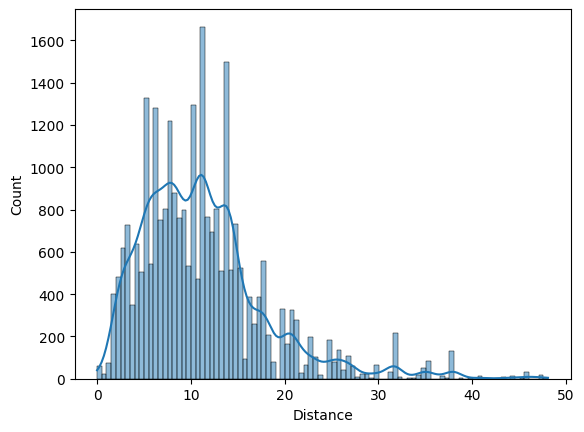

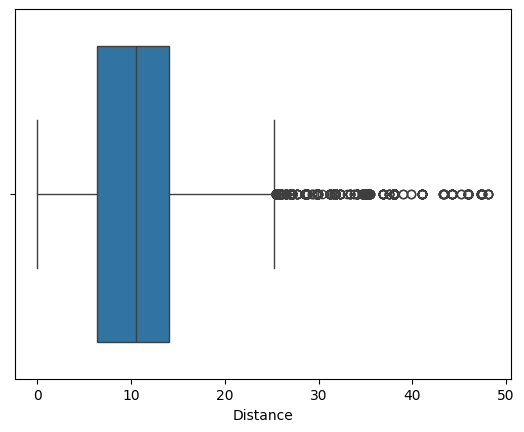

In [ ]:
sns.histplot(data=data,x='Distance',kde=True);
plt.show();
sns.boxplot(data=data,x='Distance');
plt.show();

This distribution seems right skewed
There are significant outliers
There are properties more than 20 km from CBD

Landsize Observation

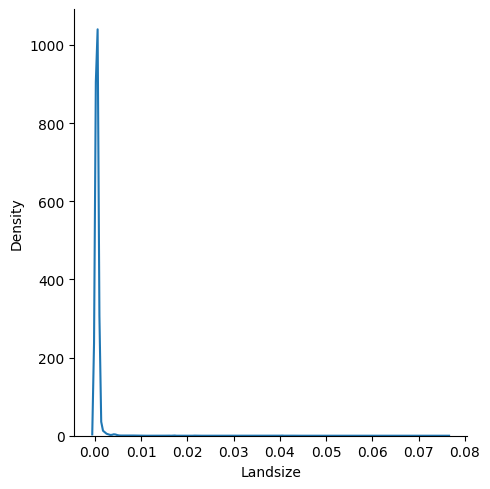

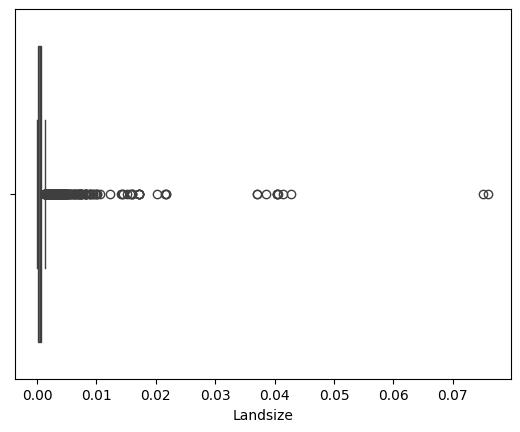

In [ ]:
sns.displot(data=data,x=data['Landsize']/1000000,kind='kde')
plt.show()
sns.boxplot(data=data,x=data['Landsize']/1000000)
plt.show()

Distribution is right skewed
There are several outliers that need to be investigated

Building Area Observations

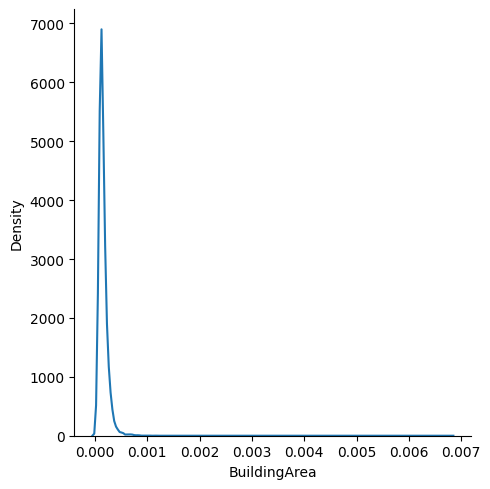

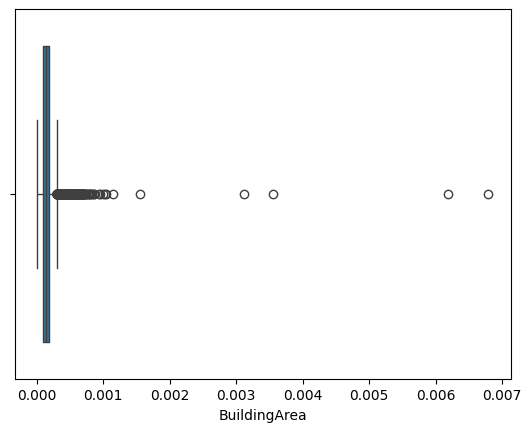

In [ ]:
sns.displot(data=data,x=data['BuildingArea']/1000000,kind='kde')
plt.show()
sns.boxplot(data=data,x=data['BuildingArea']/1000000)
plt.show()

Similar to land area building area also shows right skewed distribution and a skewness to the right

Price Observations

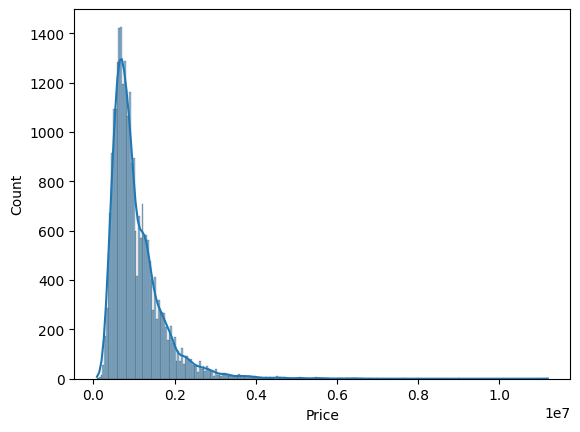

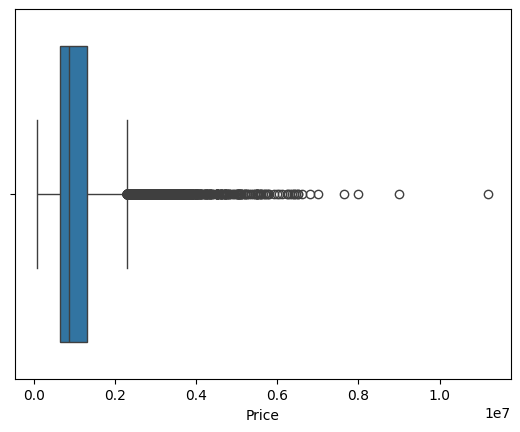

In [ ]:
sns.histplot(data=data,x=data['Price'],kde=True)
plt.show()
sns.boxplot(data=data,x=data['Price'])
plt.show()
#

There seem to be outliers in the price.This could be correlated with the CBD distance
Right skewness observed

Room Observation

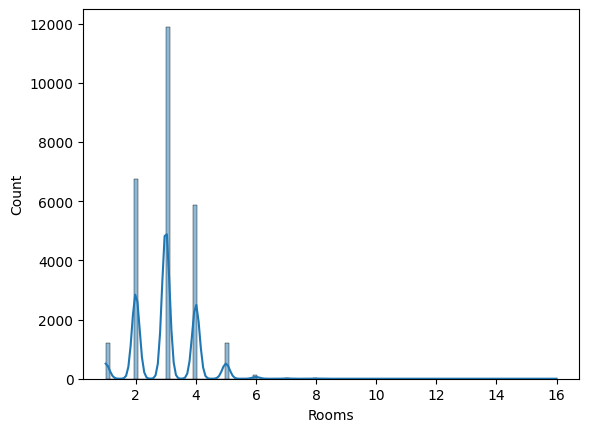

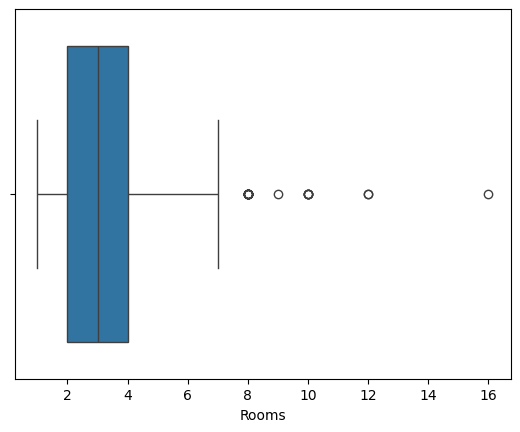

In [ ]:
sns.histplot(data=data,x=data['Rooms'],kde=True)
plt.show()
sns.boxplot(data=data,x=data['Rooms'])
plt.show()

Outliers are present with houses having more than 7 rooms
Lets get more info on these properties

In [ ]:
data.loc[data['Rooms']>7].shape

(23, 16)

There are 23 properties

Region Name Observations

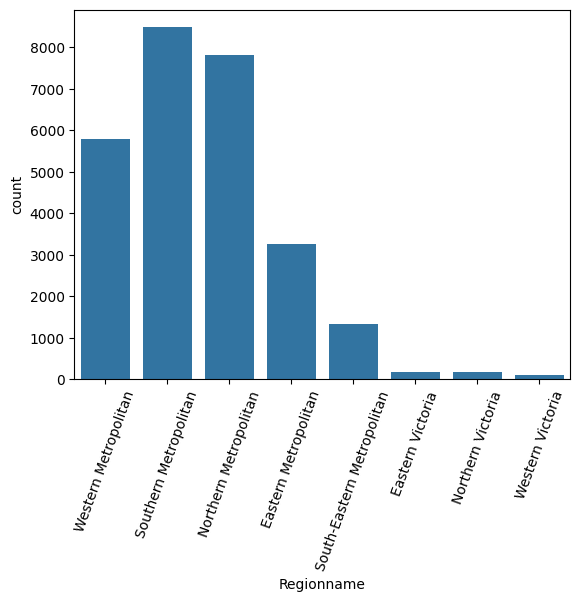

In [ ]:
sns.countplot(data=data,x='Regionname')
plt.xticks(rotation=70)
plt.show()

The western,southern and northern met regions have more properties than the rest

Bivariate Analysis

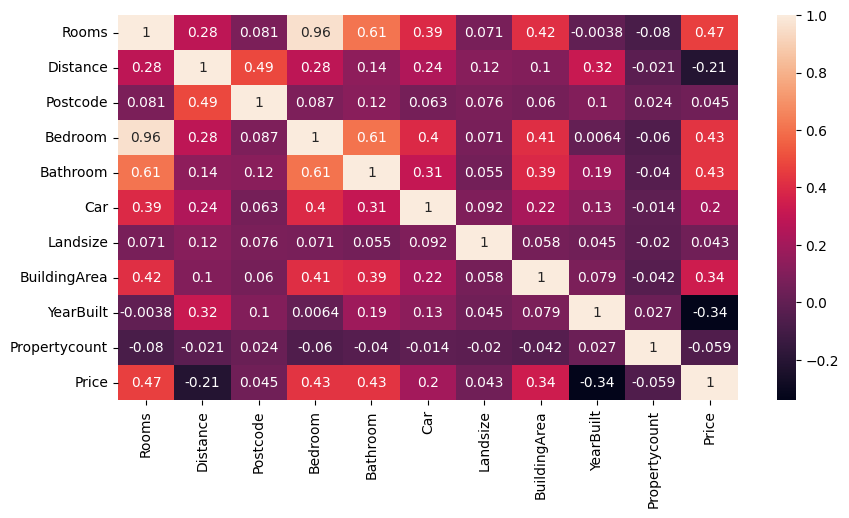

In [ ]:
numeric_df = data.select_dtypes(include='number')
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

Price has a high correlation with rooms , bedrooms,bathrooms
Price and distance share a -ve correlation or as distance increases price decreases
Price and year built also have a -ve correlation

Analyze the relation between price and total no of rooms in a property

In [ ]:
data['Total Space'] = data['Rooms']+ data['Bedroom'] + data['Bathroom'] + data['Car']

<Figure size 1000x500 with 0 Axes>

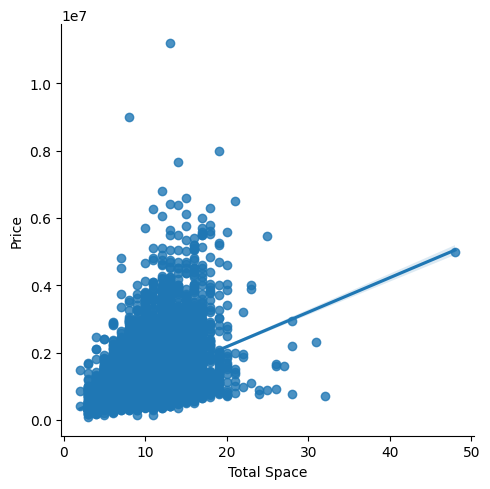

In [ ]:
plt.figure(figsize=(10,5))
sns.lmplot(data=data,x='Total Space',y='Price')
plt.show()

As total space increases price increases

Distance vs Price

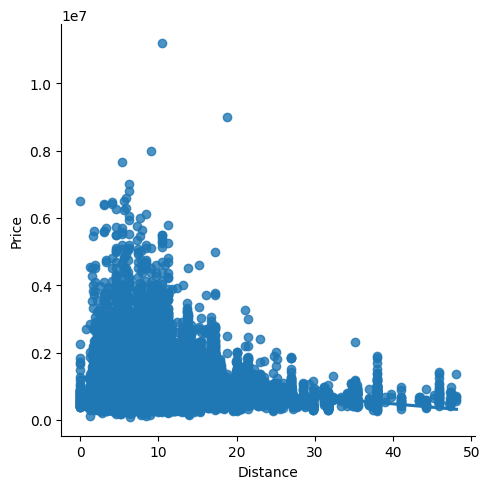

In [ ]:
sns.lmplot(data=data,x='Distance',y='Price')
plt.show()

Distance plays a key role
The lesser the dist the more the price

Use of bins for distance
0-15 km - > Nearby
16- 30 km - > Moderately Close
31 - 50 km - > Far

In [ ]:
data['Distance_bins'] = pd.cut(data['Distance'],bins=[0,15,30,50],labels=['Nearby','Moderately Close','Far'],right=False)

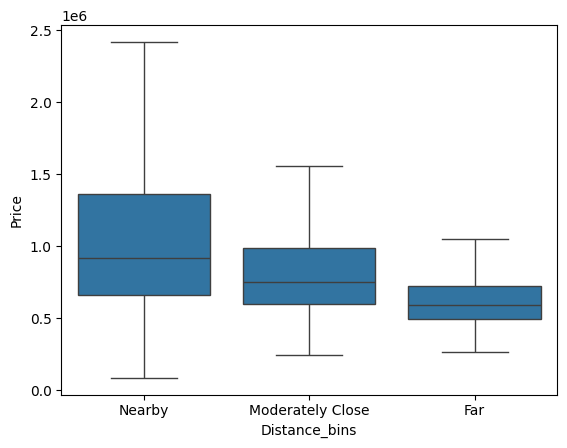

In [ ]:
sns.boxplot(data=data,x='Distance_bins',y='Price',showfliers=False)
plt.show()

As dist increase price decreases

Year Built vs Price

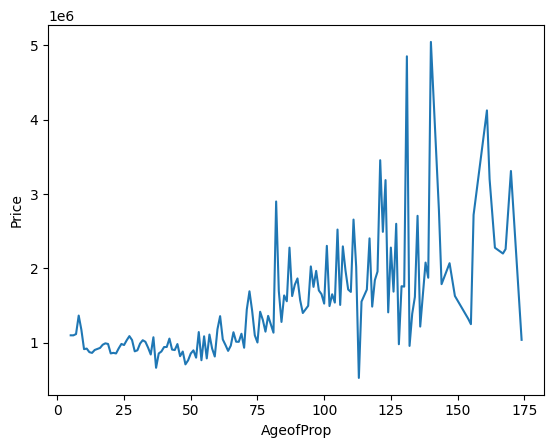

In [ ]:
data['AgeofProp'] = 2024-data['YearBuilt']
sns.lineplot(data=data,x='AgeofProp',y='Price',errorbar=None);
plt.show();

Properties that are older have a higher selling price

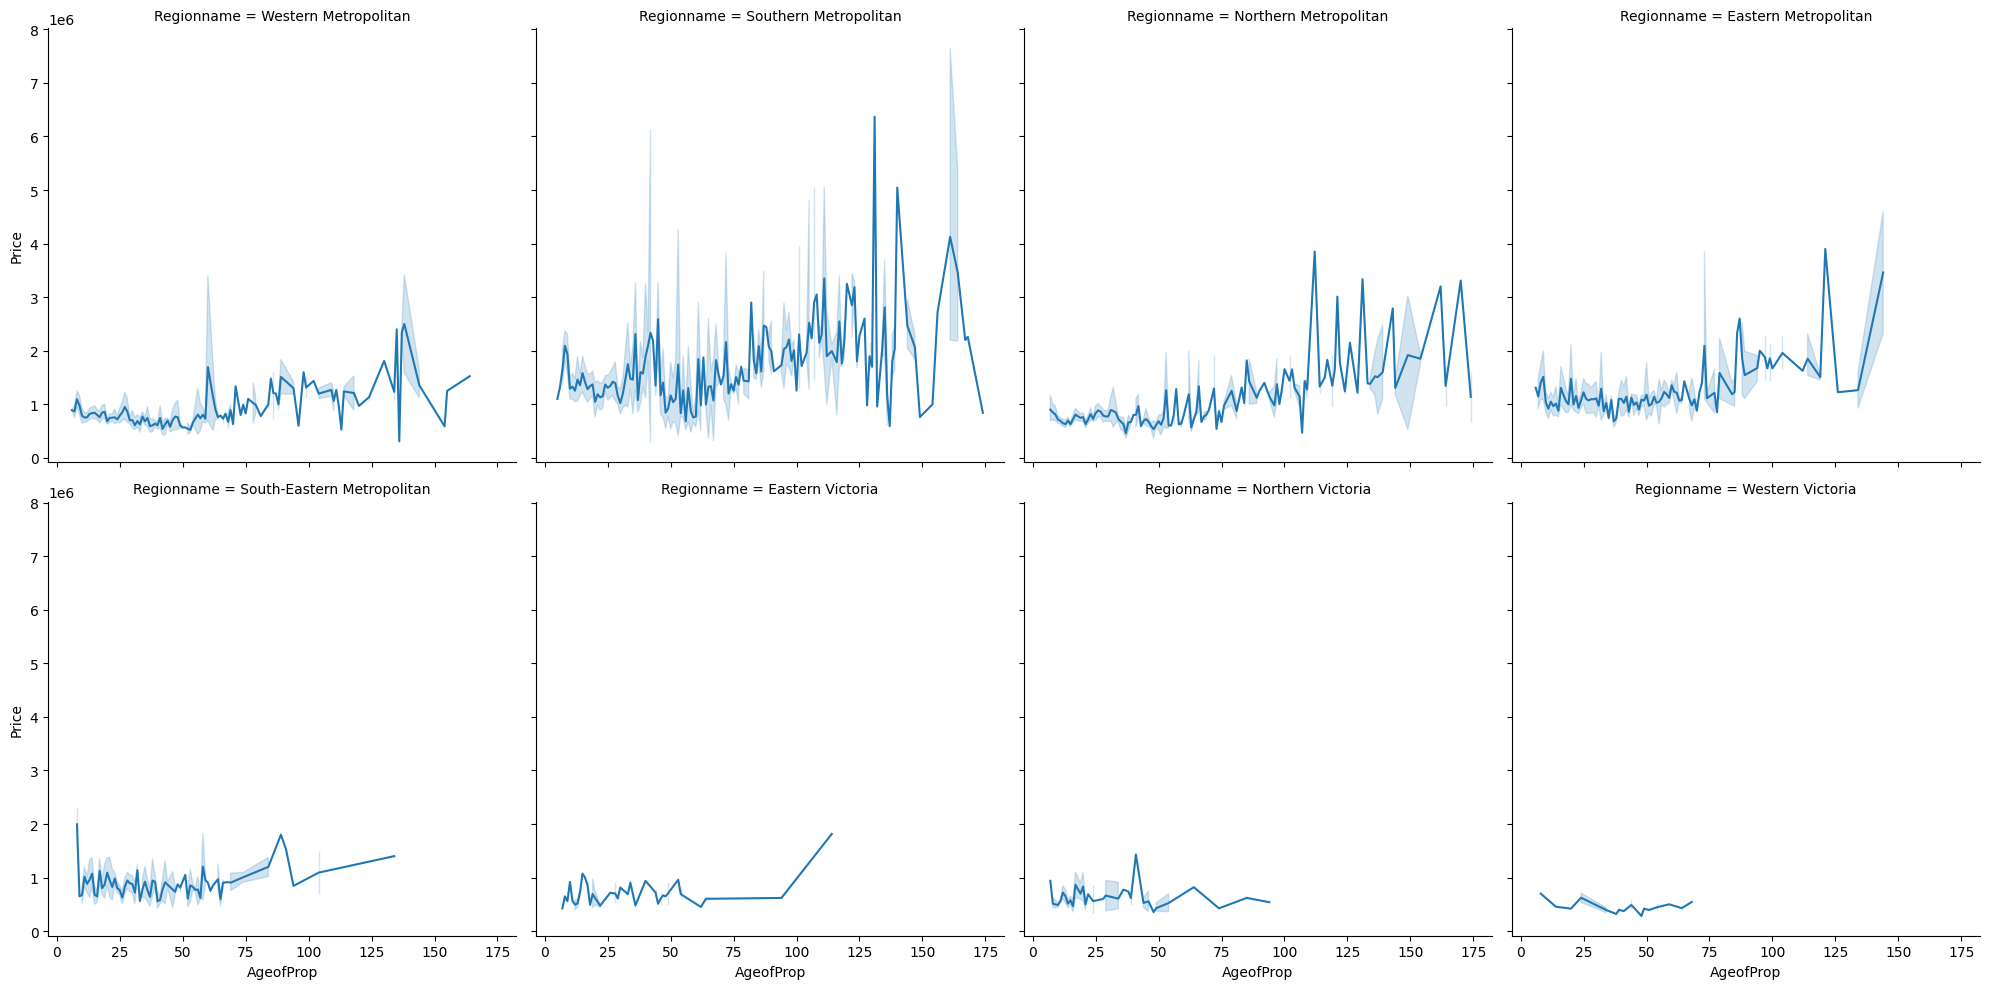

In [ ]:
sns.relplot(data=data,x='AgeofProp',y='Price',col='Regionname',kind='line',col_wrap=4);
plt.show()

When split by region we can see the trend

Price vs Type

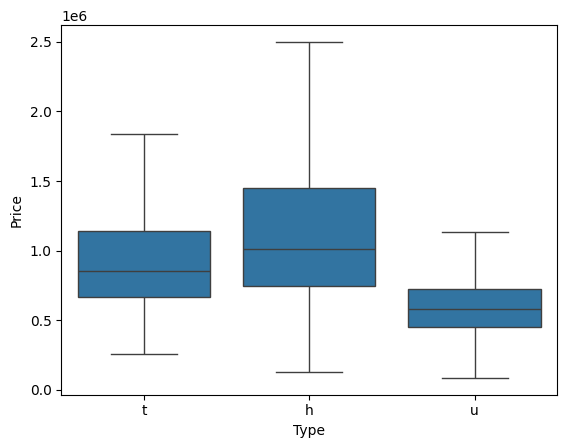

In [ ]:
sns.boxplot(data=data,x='Type',y='Price',showfliers=False)
plt.show()

Regionname vs Price

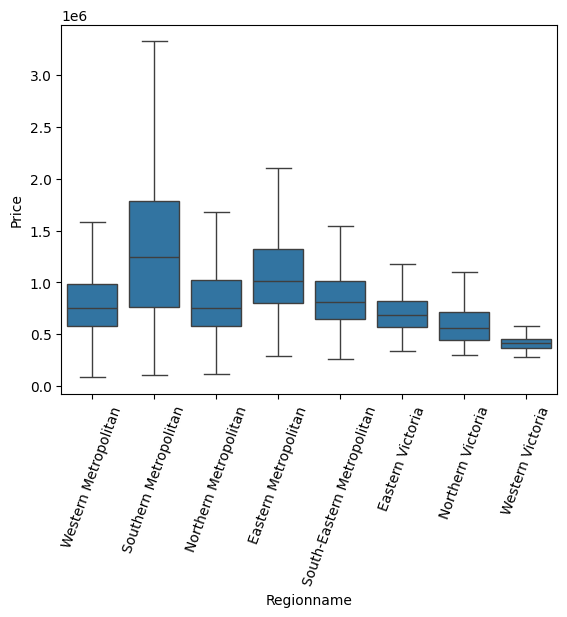

In [ ]:
sns.boxplot(data=data,x='Regionname',y='Price',showfliers=False)
plt.xticks(rotation=70)
plt.show()

Southern and Eastern Metro properties are costliers compared to others

Missing Value Treatment

In [ ]:
data.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
SellerG,0
Date,0
Distance,1
Postcode,1
Bedroom,6425
Bathroom,6431
Car,6806


In [ ]:
pd.DataFrame({'%':data.isnull().sum()/data.shape[0]*100})

,%
Suburb,0.000
Rooms,0.000
Type,0.000
SellerG,0.000
Date,0.000
Distance,0.004
Postcode,0.004
Bedroom,23.706
Bathroom,23.728
Car,25.112


Missing Value Treatment for Distance

In [ ]:
data.loc[data['Distance'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
9590,Fawkner Lot,3,h,Brad,06-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


In [ ]:
data.loc[data['Suburb']=='Fawkner Lot']

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
9590,Fawkner Lot,3,h,Brad,06-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


In [ ]:
data = data.drop(9590).reset_index(drop=True)

In [ ]:
pd.DataFrame({'%':data.isnull().sum()/data.shape[0]*100})

,%
Suburb,0.000
Rooms,0.000
Type,0.000
SellerG,0.000
Date,0.000
Distance,0.000
Postcode,0.000
Bedroom,23.703
Bathroom,23.725
Car,25.109


In [ ]:
data.loc[data['Bedroom'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
8,Altona North,4,h,hockingstuart,03-09-2016,11.100,3025.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,NaN,Nearby,NaN
12,Ashburton,2,h,Marshall,03-09-2016,11.000,3147.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,NaN,Nearby,NaN
14,Avondale Heights,4,h,Jellis,03-09-2016,10.500,3034.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,NaN,Nearby,NaN
25,Balwyn North,4,u,hockingstuart,03-09-2016,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,NaN,Nearby,NaN
26,Balwyn North,2,h,Fletchers,03-09-2016,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,NaN,Nearby,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,Footscray,2,u,McGrath,30-09-2017,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,NaN,Nearby,NaN
27089,Forest Hill,2,h,Fletchers,30-09-2017,15.400,3131.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,NaN,Moderately Close,NaN
27090,Glen Waverley,3,u,Ray,30-09-2017,16.700,3150.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,NaN,Moderately Close,NaN
27093,Kingsbury,2,t,RW,30-09-2017,12.100,3083.000,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,NaN,Nearby,NaN


In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Bathroom'].value_counts(dropna=False)

,count
Bathroom,
NaN,6424


In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Car'].value_counts(dropna=False)

,count
Car,
NaN,6424


In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Landsize'].value_counts(dropna=False)

,count
Landsize,
NaN,6418
594.000,1
446.000,1
338.000,1
250.000,1
549.000,1
239.000,1


In [ ]:
data.loc[data['Bedroom'].isnull()==True,'BuildingArea'].value_counts(dropna=False)

,count
BuildingArea,
NaN,6424


In [ ]:
data.loc[data['Bedroom'].isnull()==True,'YearBuilt'].value_counts(dropna=False)

,count
YearBuilt,
NaN,6424


There is a pattern between bedroom,bath,car,etc wrt missing data

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Suburb'].value_counts(dropna=False)

,count
Suburb,
Reservoir,236
Bentleigh East,144
St Kilda,116
Glenroy,116
Richmond,111
...,...
Cranbourne East,1
Melton West,1
New Gisborne,1


In [ ]:
data['Suburb'].nunique()

344

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Regionname'].value_counts(dropna=False)

,count
Regionname,
Southern Metropolitan,2197
Northern Metropolitan,1912
Western Metropolitan,1212
Eastern Metropolitan,728
South-Eastern Metropolitan,317
Eastern Victoria,26
Northern Victoria,25
Western Victoria,7


Group by properties based on region and type

In [ ]:
data.groupby(['Regionname','Type'])[['Bedroom','Bathroom','Car']].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

In [ ]:
data['Bedroom'] = data['Bedroom'].fillna(data.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))

In [ ]:
data['Bathroom'] = data['Bathroom'].fillna(data.groupby(['Regionname','Type'])['Bathroom'].transform('mean'))

In [ ]:
data['Car'] = data['Car'].fillna(data.groupby(['Regionname','Type'])['Car'].transform('mean'))

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Perc':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Perc
Landsize,9229,34.053
BuildingArea,16573,61.150
YearBuilt,15117,55.778
Total Space,6805,25.109
AgeofProp,15117,55.778


In [ ]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

Missing value for Total Space

In [ ]:
data.drop('Total Space',axis=1,inplace=True)
data['Total_Space_New'] = data['Rooms']+ data['Bedroom'] + data['Bathroom'] + data['Car']
data['Total_Space_New'] = data['Total_Space_New'].astype(int)

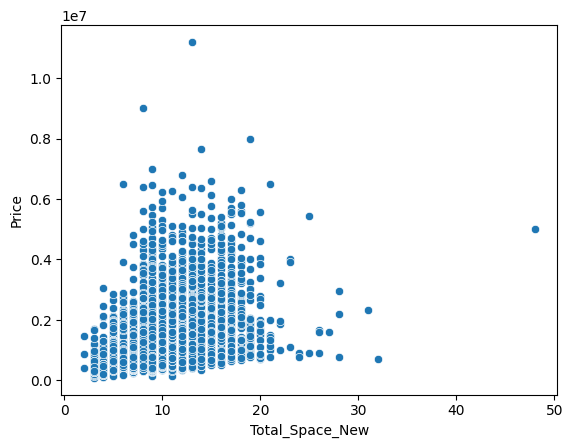

In [ ]:
sns.scatterplot(data=data,x='Total_Space_New',y='Price')
plt.show()

Missing Value Treatment for Landsize

In [ ]:
data.groupby(['Regionname','Type'])[['Landsize']].median()

Landsize
Regionname                 Type          
Eastern Metropolitan       h      693.500
                           t      236.000
                           u      208.000
Eastern Victoria           h      840.000
                           u      230.000
Northern Metropolitan      h      482.000
                           t      145.000
                           u       50.000
Northern Victoria          h      737.500
                           u      315.000
South-Eastern Metropolitan h      632.000
                           t      248.000
                           u      210.000
Southern Metropolitan      h      593.000
                           t      267.000
                           u       50.000
Western Metropolitan       h      537.000
                           t      200.000
                           u       80.000
Western Victoria           h      603.000

In [ ]:
data['Landsize'] = data['Landsize'].fillna(data.groupby(['Regionname','Type'])['Landsize'].transform('median'))

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Perc':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Perc
BuildingArea,16573,61.150
YearBuilt,15117,55.778
AgeofProp,15117,55.778


In [ ]:
data.drop(['BuildingArea','YearBuilt','AgeofProp'],axis=1,inplace=True)

In [ ]:
data.to_csv('Melbourne_Housing_NoMissing.csv',index=False)

Outlier Treatment

In [ ]:
data = pd.read_csv('Melbourne_Housing_NoMissing.csv')
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,Distance_bins,Total_Space_New
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3,2,1,303.000,Western Metropolitan,3464,840000,Nearby,9
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2,1,0,120.000,Southern Metropolitan,3280,1275000,Nearby,5
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2,1,0,159.000,Southern Metropolitan,3280,1455000,Nearby,5
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3,2,4,853.000,Northern Metropolitan,2211,2000000,Nearby,13
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3,2,2,208.000,Northern Metropolitan,2211,1110000,Nearby,10


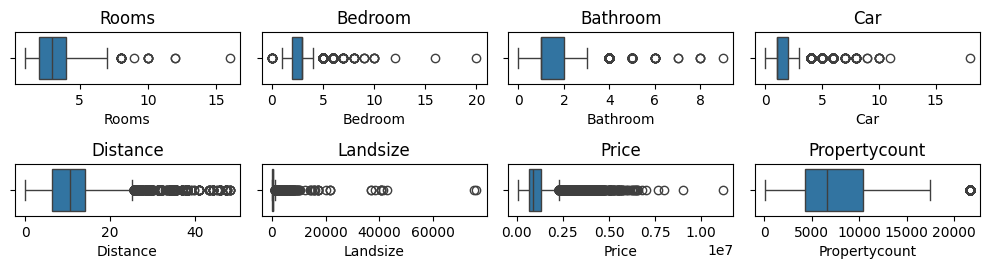

In [ ]:
numeric_columns = ['Rooms','Bedroom','Bathroom','Car','Distance','Landsize','Price','Propertycount']
plt.figure(figsize=(10,5))

for i , variable in enumerate(numeric_columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=data,x=variable)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [ ]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3-Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR
#

In [ ]:
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

,0
Rooms,0.085
Bedroom,4.195
Bathroom,0.871
Car,4.306
Distance,4.343
Landsize,1.742
Price,4.660
Propertycount,2.671


We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using Q1 - 1.5*IQR and Q3 + 1.5*IQR, respectively.

In [ ]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

Treat outliers

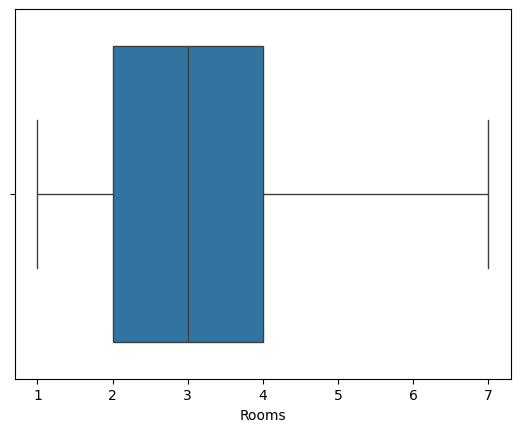

In [ ]:
data = treat_outliers(data,'Rooms')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Rooms')
plt.show()

In [ ]:
# treating outliers of Bedroom column
data = treat_outliers(data,'Bedroom')

# treating outliers of Car column
data = treat_outliers(data,'Car')

# treating outliers of Bathroom column
data = treat_outliers(data,'Bathroom')

# treating outliers of Landsize column
data = treat_outliers(data,'Landsize')

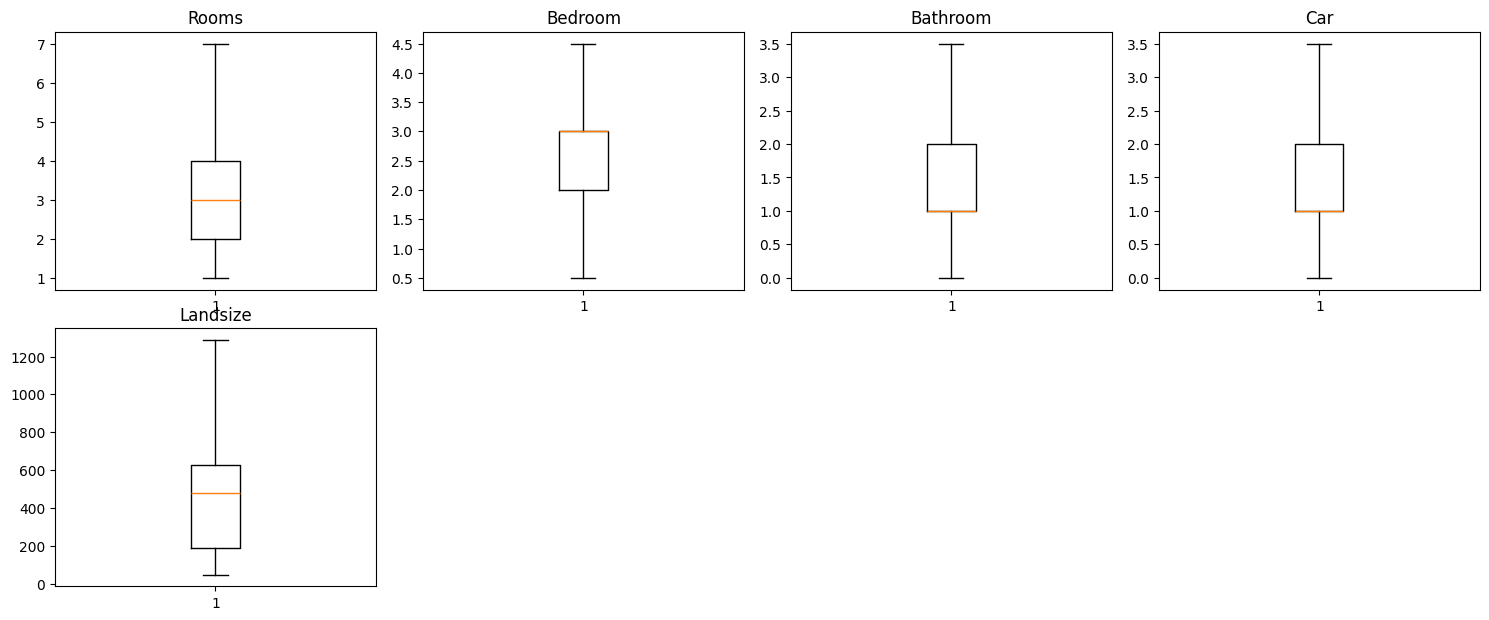

In [ ]:
numeric_columns = ['Rooms', 'Bedroom', 'Bathroom', 'Car','Landsize']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)